# Lab 11 - Skewness and Correlation - Florentin Degbo

### Introduction
1. Context:
2. Objectives:
3. Data description: a short description about the name of each columns
   - Distance: distance of the house from the central business district
   - SellerG: 
   - Type:
   - Method: the method of sale
   - Propertycount: 

### Importing Libraires

In [4]:
# general librairies
import numpy as np
import pandas as pd
import math

# data vizualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [6]:
df = pd.read_csv('housing.csv')

In [7]:
housing = df.copy()

In [8]:
housing.head().T

0                           1  \
Suburb                    Abbotsford                Airport West   
Address                68 Studley St               154 Halsey Rd   
Rooms                              2                           3   
Type                               h                           t   
Method                            SS                          PI   
SellerG                       Jellis                      Nelson   
Date                        3/9/2016                    3/9/2016   
Distance                         2.5                        13.5   
Postcode                      3067.0                      3042.0   
Bedroom                          2.0                         3.0   
Bathroom                         1.0                         2.0   
Car                              1.0                         1.0   
Landsize                       126.0                       303.0   
BuildingArea                     inf                         225   
YearBuilt                        NaN                      2016.0   
CouncilArea       Yarra City Council  Moonee Valley City Council   
Latitude                    -37.8014                     -37.718   
Longtitude                  144.9958                     144.878   
Regionname     Northern Metropolitan        Western Metropolitan   
Propertycount                 4019.0                      3464.0   
ParkingArea                  Carport             Detached Garage   
Price                            NaN                    840000.0   

                                       2                          3  \
Suburb                       Albert Park                Albert Park   
Address                   105 Kerferd Rd           85 Richardson St   
Rooms                                  2                          2   
Type                                   h                          h   
Method                                 S                          S   
SellerG                    hockingstuart                    Thomson   
Date                            3/9/2016                   3/9/2016   
Distance                             3.3                        3.3   
Postcode                          3206.0                     3206.0   
Bedroom                              2.0                        2.0   
Bathroom                             1.0                        1.0   
Car                                  0.0                        0.0   
Landsize                           120.0                      159.0   
BuildingArea                          82                        inf   
YearBuilt                         1900.0                        NaN   
CouncilArea    Port Phillip City Council  Port Phillip City Council   
Latitude                        -37.8459                    -37.845   
Longtitude                      144.9555                   144.9538   
Regionname         Southern Metropolitan      Southern Metropolitan   
Propertycount                     3280.0                     3280.0   
ParkingArea              Attached Garage                     Indoor   
Price                          1275000.0                  1455000.0   

                                   4  
Suburb                    Alphington  
Address                 30 Austin St  
Rooms                              3  
Type                               h  
Method                            SN  
SellerG                      McGrath  
Date                        3/9/2016  
Distance                         6.4  
Postcode                      3078.0  
Bedroom                          3.0  
Bathroom                         2.0  
Car                              1.0  
Landsize                       174.0  
BuildingArea                     122  
YearBuilt                     2003.0  
CouncilArea     Darebin City Council  
Latitude                    -37.7818  
Longtitude                  145.0198  
Regionname     Northern Metropolitan  
Propertycount                 2211.0  
ParkingArea      

In [9]:
housing.shape

(34857, 22)

In [10]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [12]:
housing.describe().T

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom        26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Latitude       26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom             2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Latitude          -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07

In [13]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [14]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [15]:
# renaming some columns: SellerG, Postcode, BuildingArea, YearBuilt, Regionname, ParkingArea
housing = housing.rename(columns={'SellerG':'Seller_Agent', 'Postcode':'Post_Code', 'BuildingArea': 'Building_Area', 'YearBuilt':'Year_Built', 
'Regionname':'Region_Name', 'ParkingArea':'Parking_Area'})


In [16]:
# checking for any duplicated rows
housing.duplicated().sum()

0

In [17]:
# let's suppose that there are duplicated rows 
# we need to get rid of them
# housing.drop_duplicates(inplaced=True)

In [18]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'Seller_Agent', 'Date',
       'Distance', 'Post_Code', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'Building_Area', 'Year_Built', 'CouncilArea', 'Latitude', 'Longtitude',
       'Region_Name', 'Propertycount', 'Parking_Area', 'Price'],
      dtype='object')

### Univariate Analysis
1.  Performing analysis on one variable
2.  The key point is that there is only one variable in the dataset
3.  For this reason we will use "Distance" for the univariate analysis 

In [20]:
housing_1 = housing['Distance']
housing_1.head()

0     2.5
1    13.5
2     3.3
3     3.3
4     6.4
Name: Distance, dtype: float64

In [21]:
housing_1.shape

(34857,)

In [22]:
len(housing_1)

34857

In [23]:
housing_1.isnull().sum()

1

In [24]:
housing_1.dropna(inplace=True)

In [25]:
housing_1.isnull().sum()

0

In [26]:
# duplicated rows 
housing_1.duplicated().sum()

34641

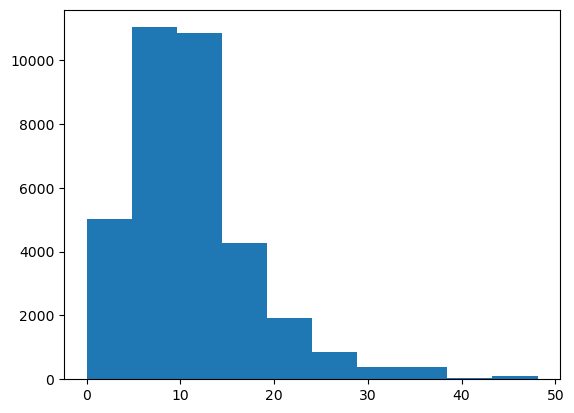

In [27]:
# data distribution: Visualization
plt.hist(housing['Distance']);

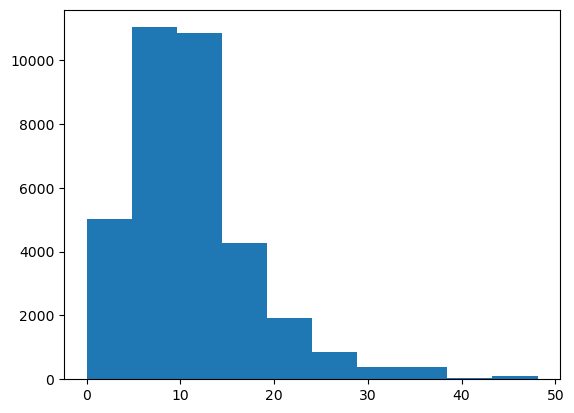

In [28]:
# data distribution: Visualization
plt.hist(housing_1);

### Examining the Skewness in Distance Univariate Dataset Using Statistical Measures
1. mean: average of a variable
2. median: The middle value in a variable
3. mode: the most frequent values in a variable
4. Let's plot th skewness in the Distance variable

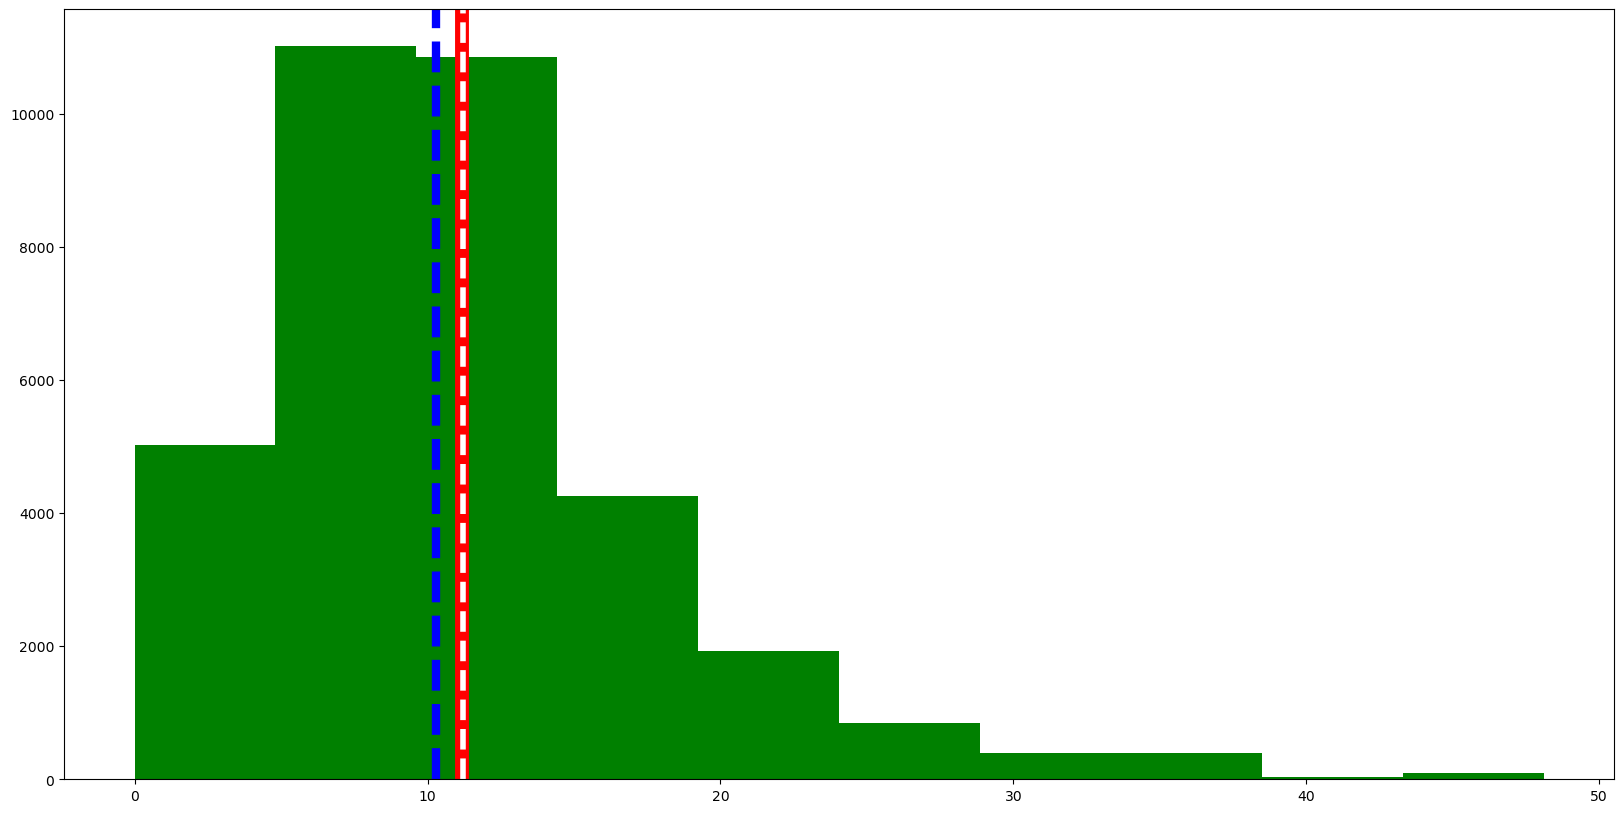

In [30]:
# 1. setting the size of the plot
plt.figure(figsize=(20, 10))

# 2. creating a simple histogram with green color
plt.hist(housing_1, color='g')


# 3. calculating the mean() giving the mean line a red color
plt.axvline(housing_1.mean(), color='r', linewidth= 10)

# 4.  calculating the median() giving the median line a blue color, a dashed style
plt.axvline(housing_1.median(), color='b', linewidth= 6, linestyle='dashed')

# 5.  calculating the mode() giving the mode line a white color, a dashed style
plt.axvline(housing_1.mode()[0], color='w', linewidth= 4, linestyle='dashed');

### Conclusion:
- Add 19 points
1. The dataset showed a slight positive skew, indicating that most values were clustered toward the lower end with a few higher outliers.
2. The correlation matrix helped reveal strong positive relationships between specific variables.
3. A strong positive correlation was observed between variables like X and Y, suggesting they increase together.
4. Some variables had near-zero correlation, showing no meaningful relationship between them.
5. A few variables exhibited a negative correlation, meaning that as one increased, the other decreased.
6. Boxplots highlighted the presence of outliers in several features.
7. Using Z-scores, I confirmed which data points qualified as outliers statistically.
8. Removing outliers significantly improved the symmetry of the data distribution.
9. Outlier removal had minimal impact on some features, suggesting robust, naturally tight distributions.
10. Some data distributions became more normal after outlier handling, which benefits statistical analysis.
11. I observed that not all extreme values should automatically be removedâ€”context matters.
12. Histograms were very helpful in visualizing skewness and understanding data spread.
13. Scatterplots made it easier to identify both correlation and potential outliers visually.
14. There was evidence that linear relationships existed between specific pairs of variables.
15. Variables with high skewness were prone to generating misleading averages (mean vs median).
16. Applying Winsorization (capping extreme values) effectively reduced the influence of extreme outliers without deleting data.
17. A few variables were left-skewed, indicating a longer tail on the left side.
18. Calculating Z-scores manually improved my understanding of standard deviation and mean relationships.
19. Some features displayed bimodal distributions, meaning the data had two distinct peaks.



##### End of Lab 11